# PAD4 Measurement

This notebook is an example of measuring impedance in a stack of several cells at once.

The main channel is connected to the stack and the two PAD4 channels are each connected to one of the two cells.  
For this example, the cells are each a parallel connection of a capacitor with a resistor and a series resistor.

The impedance spectra are then imported into Python and plotted using matplotlib.

## 1. Connect Python to the already launched Thales-Software

In [ ]:
import sys
from thales_remote.connection import ThalesRemoteConnection
from thales_remote.script_wrapper import PotentiostatMode,ThalesRemoteScriptWrapper

'''
Import the ISM import package and the matplotlib plotting library.
'''
from thales_file_import.ism_import import IsmImport
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import EngFormatter

TARGET_HOST = "localhost"

if __name__ == '__main__':
    '''
    The Thales software must first be started so that it can be connected.
    '''
    ZenniumConnection = ThalesRemoteConnection()
    connectionSuccessful = ZenniumConnection.connectToTerm(TARGET_HOST, "ScriptRemote")
    if connectionSuccessful:
        print("connection successfull")
    else:
        print("connection not possible")
        sys.exit()
          
    ZahnerZennium = ThalesRemoteScriptWrapper(ZenniumConnection)
  
    ZahnerZennium.forceThalesIntoRemoteScript()

connection successfull


## 2. Setting the parameters for the measurement

After the connection with Thales, the naming of the files of the measurement results is set.

Measure EIS spectra with a sequential number in the file name that has been specified.
Starting with number 1.

In [ ]:
    ZahnerZennium.setEISNaming("counter")
    ZahnerZennium.setEISCounter(1)
    ZahnerZennium.setEISOutputPath(r"C:\THALES\temp\test1")
    ZahnerZennium.setEISOutputFileName("spectra_cells")

Setting the parameters for the spectra.
Alternatively a rule file can be used as a template.

In [ ]:
    ZahnerZennium.setPotentiostatMode(PotentiostatMode.POTMODE_POTENTIOSTATIC)
    ZahnerZennium.setAmplitude(100e-3)
    ZahnerZennium.setPotential(0)
    ZahnerZennium.setLowerFrequencyLimit(0.05)
    ZahnerZennium.setStartFrequency(1000)
    ZahnerZennium.setUpperFrequencyLimit(100000)
    ZahnerZennium.setLowerNumberOfPeriods(2)
    ZahnerZennium.setLowerStepsPerDecade(5)
    ZahnerZennium.setUpperNumberOfPeriods(20)
    ZahnerZennium.setUpperStepsPerDecade(10)
    ZahnerZennium.setScanDirection("startToMax")
    ZahnerZennium.setScanStrategy("single")

## 3. Setting up PAD4

The individual PAD4 channels must be switched on and finally the general PAD4 must be allowed for impedance measurement.

In [ ]:
    ZahnerZennium.setupPAD4(1,1,1)
    ZahnerZennium.setupPAD4(1,2,1)
    ZahnerZennium.enablePAD4()

## 4. Spectra measurement
After setting the parameters, the measurement is started.  
Switching on the potentiostat before the measurement, so that EIS is measured at the set DC potential.  
If the potentiostat is off before the measurement, the measurement is performed at the OCP.  
After the measurement the potentiostat is switched off.

In [ ]:
    ZahnerZennium.enablePotentiostat()
    ZahnerZennium.measureEIS()
    ZahnerZennium.disablePotentiostat()
    ZenniumConnection.disconnectFromTerm()

## 5. Importing the ism file

Import the spectrum from the previous measurement.
This was saved under the set path and name with the number expanded.  
The files of the measurement results with PAD4 are numbered consecutively. The lowest number is the main channel of the potentiostat.  
The measurement starts at 1 therefore the following path results: "C:\THALES\temp\test1\spectra_cells_0001_ser00.ism".

In [2]:
    ismFileStack = IsmImport(r"C:\THALES\temp\test1\spectra_cells_0001_ser00.ism")
    impedanceFrequenciesStack = ismFileStack.getFrequencyArray()
    impedanceAbsoluteStack = ismFileStack.getImpedanceArray()
    impedancePhaseStack = ismFileStack.getPhaseArray()
    impedanceComplexStack = ismFileStack.getComplexImpedanceArray()
    
    ismFileCell1 = IsmImport(r"C:\THALES\temp\test1\spectra_cells_0001_ser01.ism")
    impedanceFrequenciesCell1 = ismFileCell1.getFrequencyArray()
    impedanceAbsoluteCell1 = ismFileCell1.getImpedanceArray()
    impedancePhaseCell1 = ismFileCell1.getPhaseArray()
    impedanceComplexCell1 = ismFileCell1.getComplexImpedanceArray()
    
    ismFileCell2 = IsmImport(r"C:\THALES\temp\test1\spectra_cells_0001_ser02.ism")
    impedanceFrequenciesCell2 = ismFileCell2.getFrequencyArray()
    impedanceAbsoluteCell2 = ismFileCell2.getImpedanceArray()
    impedancePhaseCell2 = ismFileCell2.getPhaseArray()
    impedanceComplexCell2 = ismFileCell2.getComplexImpedanceArray()

## 6. Displaying the measurement results

The spectra are presented in the Nyquist representation.

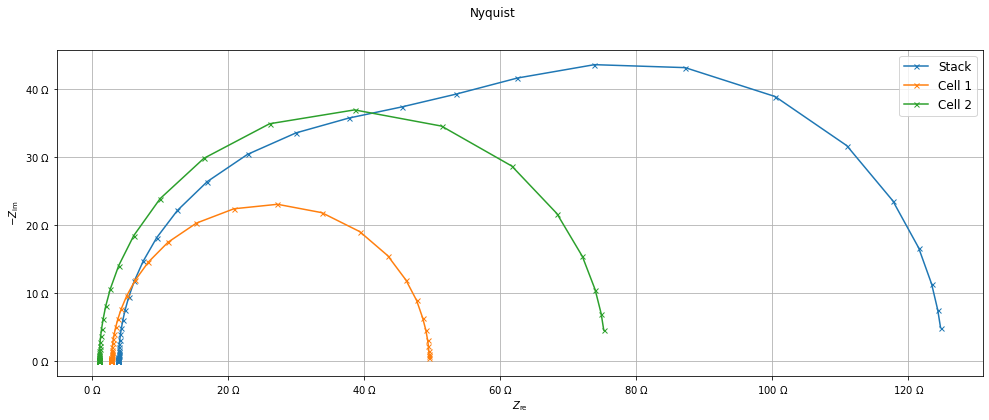

In [3]:
    plt.ion()
    figNyquist, (nyquistAxis) = plt.subplots(1, 1)
    figNyquist.suptitle("Nyquist")
    
    nyquistAxis.plot(np.real(impedanceComplexStack), -np.imag(impedanceComplexStack), marker="x", markersize=5, label="Stack")
    nyquistAxis.plot(np.real(impedanceComplexCell1), -np.imag(impedanceComplexCell1), marker="x", markersize=5, label="Cell 1")
    nyquistAxis.plot(np.real(impedanceComplexCell2), -np.imag(impedanceComplexCell2), marker="x", markersize=5, label="Cell 2")
    
    nyquistAxis.grid(which="both")
    nyquistAxis.set_aspect("equal")
    nyquistAxis.xaxis.set_major_formatter(EngFormatter(unit="$\Omega$"))
    nyquistAxis.yaxis.set_major_formatter(EngFormatter(unit="$\Omega$"))
    nyquistAxis.set_xlabel(r"$Z_{\rm re}$")
    nyquistAxis.set_ylabel(r"$-Z_{\rm im}$")
    nyquistAxis.legend(fontsize = "large")
    figNyquist.set_size_inches(30, 6)
    plt.show()